Using two DataSets:

 1. DSNY_Monthly_Tonnage_Data.csv

 2. CD_Population_Estimates.csv

We are able to delinate the data needed to calculate and portray a multitude of important factors within the data.

We are also able to distinguish across these datasets the implications of the amount of refuse per borough in New York City has, when combined with population in a period which runs from 1992 through 2018.




In [333]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [334]:
# Read in Refuse DataFrame
# calculate year and month column based on date column

df = pd.read_csv("Resources/DSNY_Monthly_Tonnage_Data.csv")
df_pop = pd.read_csv("CD_Population_Estimates.csv")
df.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1993 / 11,Manhattan,1,625.2,119.4,34.4,NaN,NaN,NaN,NaN,1
1,1995 / 09,Manhattan,1,633.1,117.2,45.8,NaN,NaN,NaN,NaN,1
2,1995 / 08,Manhattan,1,627.5,82.4,35.6,NaN,NaN,NaN,NaN,1
3,2012 / 03,Manhattan,1,1194.4,341.6,210.8,NaN,NaN,NaN,NaN,1
4,1992 / 03,Manhattan,1,726.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [335]:
# Setting to these columns gets rid of the columns we do not want to use
    # from the DSNY_Monthly_Tonnage_Data.csv dataset

df = pd.read_csv("Resources/DSNY_Monthly_Tonnage_Data.csv", usecols=['MONTH',
                                                                     'BOROUGH', 
                                                                     'COMMUNITYDISTRICT',
                                                                     'REFUSETONSCOLLECTED',
                                                                     'MGPTONSCOLLECTED',
                                                                     'BOROUGH_ID'])

df

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,MGPTONSCOLLECTED,BOROUGH_ID
0,1993 / 11,Manhattan,1,625.2,34.4,1
1,1995 / 09,Manhattan,1,633.1,45.8,1
2,1995 / 08,Manhattan,1,627.5,35.6,1
3,2012 / 03,Manhattan,1,1194.4,210.8,1
4,1992 / 03,Manhattan,1,726.0,NaN,1
...,...,...,...,...,...,...
20512,1992 / 01,Bronx,6,2165.9,NaN,2
20513,1991 / 04,Bronx,6,2240.2,NaN,2
20514,1993 / 09,Bronx,6,1954.7,NaN,2
20515,1992 / 09,Bronx,6,2107.1,NaN,2


In [336]:
df_pop.head(2)

,CD_ID,Borough,CD Number,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bronx 1,Bronx,1,77214.0,77391.393304,77605.860240,78292.870813,78735.102210,79140.123156,79505.86392,...,90183.747541,91497.0,92740.278371,94276.970332,95570.824555,96772.481922,97976.511446,98863.586492,99060.342574,99104.354520
1,Bronx 2,Bronx,2,39443.0,40017.132148,40606.750589,41443.115821,42150.799982,42837.751716,43502.19453,...,51487.165274,52246.0,52964.946346,53851.551215,54599.535124,55294.902872,55991.672104,56507.325035,56628.342551,56661.902348


In [337]:
df_pop.columns

Index(['CD_ID', 'Borough', 'CD Number', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [338]:
df.head(2)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,MGPTONSCOLLECTED,BOROUGH_ID
0,1993 / 11,Manhattan,1,625.2,34.4,1
1,1995 / 09,Manhattan,1,633.1,45.8,1


In [339]:
df.columns

Index(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED',
       'MGPTONSCOLLECTED', 'BOROUGH_ID'],
      dtype='object')

In [340]:
df["Year"] = df["MONTH"].str[:4]
df["Month"] = df["MONTH"].str[-2:]

# Delete Un-wanted Years

df = df[df["Year"] !="1990"]
df = df[df["Year"] !="1991"]
df = df[df["Year"] !="2019"]
df = df[df["Year"] !="2020"]

# The index() method searches an element in the list and returns its index.
# group by borough and compute sum in order to get population
    # by borough for each year
# groupby(by = Used to determine the groups for the groupby.
    #If by is a function, it’s called on each value of the object’s index

df = df.groupby(by=["BOROUGH", "Year"]).sum()

# reset_index = resets index to numerical value

df.reset_index(inplace=True)


                             

In [341]:
df_pop = pd.read_csv("CD_Population_Estimates.csv")

In [342]:
# Input borough and year as strings ouput, population in that borough,
# that year

df_borough_pop = df_pop.groupby(by="Borough").sum()


In [343]:
# Function that looks up population given borough and year
    # applied function to borough and year in each row of the Refuse DataFrame
    # Result of the function for the population in the borough for that year, appears 
        # in the right

def pop_lookup(borough, year):
    return df_borough_pop.loc[borough, year] # get location from borough and year
                                             # locator method allows to return a 
                                                 # specific value or column by labels


In [344]:
# df["Population"] adds column of Population
# df.apply( = applies function to DataFrame and applies it row by row
# run function pop_lookup
# lambda = A lambda function can take any number of arguments, but can only have one expression
# x: = variable that is passed in, which represents the DataFrame
# lambda will take series as input, applied row by row, looks up values and applies pop_lookup to those 2 values
# axis=1 = specifies the rows and not the columns

df["Population"] = df.apply( 
    lambda x: pop_lookup(x["BOROUGH"], x["Year"]), axis=1)

#df.head()

In [345]:
# Create column using dot notation because their are no spaces in column headers


df["PerCapitaRefuse"] = df.REFUSETONSCOLLECTED / df.Population

# prints all rows
print(df.loc[:,["BOROUGH",
                "Year",
                "REFUSETONSCOLLECTED",
                "Population",
                "PerCapitaRefuse"]])

           BOROUGH  Year  REFUSETONSCOLLECTED  Population  PerCapitaRefuse
0            Bronx  1992             470892.7   1214085.0         0.387858
1            Bronx  1993             427840.6   1230073.0         0.347817
2            Bronx  1994             440798.9   1242225.0         0.354846
3            Bronx  1995             438483.8   1253781.0         0.349729
4            Bronx  1996             438951.8   1264701.0         0.347080
..             ...   ...                  ...         ...              ...
130  Staten Island  2014             179931.5    470413.0         0.382497
131  Staten Island  2015             175985.0    470858.0         0.373754
132  Staten Island  2016             176080.7    472545.0         0.372622
133  Staten Island  2017             178575.7    473842.0         0.376868
134  Staten Island  2018             181969.4    474503.0         0.383495

[135 rows x 5 columns]


              COMMUNITYDISTRICT  REFUSETONSCOLLECTED  MGPTONSCOLLECTED  \
BOROUGH Year                                                             
Bronx   1992                936             470892.7               0.0   
        1993                936             427840.6           10186.9   
        1994                936             440798.9           18260.2   
        1995                936             438483.8           21474.1   
        1996                936             438951.8           27224.2   

              BOROUGH_ID  Population  PerCapitaRefuse  
BOROUGH Year                                           
Bronx   1992         288   1214085.0         0.387858  
        1993         288   1230073.0         0.347817  
        1994         288   1242225.0         0.354846  
        1995         288   1253781.0         0.349729  
        1996         288   1264701.0         0.347080  


<function matplotlib.pyplot.show(*args, **kw)>

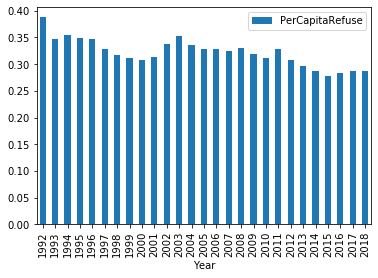

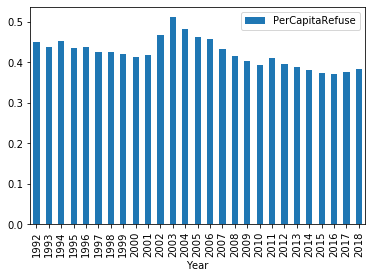

In [346]:
# Create a multi-index using columns "BOROUGH" and "Year"

df.set_index(keys=["BOROUGH", "Year"], inplace=True)
print(df.head())
df.loc["Bronx"].plot.bar(y="PerCapitaRefuse")
df.loc["Staten Island"].plot.bar(y="PerCapitaRefuse")
plt.savefig("PerCapitaRefuse.png")
plt.show